## Introduction, first look at the data

In this project I shall explore the car sales of eBay.

The dataset was scraped and uploaded to Kaggle, later modified by DataCamp.

This project was made on the DataCamp free access week, when I finished the Data Scientist and Data analyst path to polish my skillset.

In [200]:
#load everything that is needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
autos=pd.read_csv("autos.csv", encoding="Windows-1252")
%matplotlib inline

In [201]:
#look at the data
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [202]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


20 columns, mostly strings but can be categories.


## Data cleaning 1 - missing data

Most of the data is present, though there are a few columns that are not 100% loaded... this data is nowhere near as messy as one could expect it...

RepairData is the least full column with almost 1/5th of the data missing - followed by Vechicle type with a bit more than 1/10th holes. 

The rest - aside from a few - are full columns of either numbers or words that could easily be mapped (categories) to integers.

In [203]:
pseu_col=autos.columns
remap_dict={}
def make_snake(matchobj):
    return "_"+ matchobj.group(0).lower()
for item in pseu_col:
    remap_dict[item]=re.sub("[A-Z]", make_snake, item)
    #I know I could've excluded the 4 values below from the iteration but it takes no time...
    remap_dict["yearOfRegistration"]="registration_year"
    remap_dict["monthOfRegistration"]="registration_month"
    remap_dict["notRepairedDamage"]="unrepaired_damage"
    remap_dict["dateCreated"]="ad_created"
autos.rename(columns=remap_dict, inplace=True)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The columns have been changed to snake-case since that is nicer.

Also a few very strange names have been swapped out.

In [204]:
autos.describe()

,registration_year,power_p_s,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


## Data cleaning 2 - bad data

Nr of pictures is 0, I'll drop that.
There is a reg.year = 9999 which is impressive if true, I bet that it is a DeLorean... Anyway, let's remove that from the sample as well...



In [205]:
autos.drop("nr_of_pictures", inplace=True, axis=1)
autos[autos.registration_year>2019]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
453,2016-03-28 13:51:12,Armee_Jeep,privat,Angebot,"$9,800",test,NaN,4500,manuell,0,andere,"5,000km",0,NaN,jeep,NaN,2016-03-28 00:00:00,7545,2016-04-06 17:45:49
4164,2016-03-29 18:39:40,Verkaufe_DESIGN_Streifen_/_Aufkleber_VW__Opel_...,privat,Angebot,$49,control,NaN,5000,NaN,0,golf,"5,000km",12,NaN,volkswagen,NaN,2016-03-29 00:00:00,74523,2016-04-06 04:16:14
4549,2016-04-01 21:57:05,Kompressor,privat,Angebot,"$1,600",test,NaN,4100,NaN,0,NaN,"5,000km",0,NaN,sonstige_autos,NaN,2016-04-01 00:00:00,67686,2016-04-05 20:19:27
6308,2016-03-12 17:38:17,Kaufe_Autos_jeglicher,privat,Angebot,$0,test,NaN,9996,NaN,0,NaN,"10,000km",0,NaN,sonstige_autos,NaN,2016-03-12 00:00:00,21244,2016-03-12 17:38:17
8012,2016-03-23 16:43:29,Opel_GT_Karosserie_mit_Brief!,privat,Angebot,$700,test,NaN,9999,NaN,0,andere,"10,000km",0,NaN,opel,NaN,2016-03-23 00:00:00,21769,2016-04-05 20:16:15
8360,2016-03-11 22:56:30,Vito_touret_119_Blue_Tec,privat,Angebot,"$42,800",control,NaN,6200,automatik,0,vito,"10,000km",7,diesel,mercedes_benz,nein,2016-03-11 00:00:00,63739,2016-03-19 20:16:56
13559,2016-03-19 15:57:44,Saab_9000_CSE_Automatik_2_3_ltr._mit_EGSD,privat,Angebot,$0,control,NaN,9000,automatik,170,9000,"150,000km",2,benzin,saab,nein,2016-03-19 00:00:00,32457,2016-03-21 21:18:11
14341,2016-03-23 01:36:20,Hole_kostenlos_ab,privat,Angebot,$0,test,NaN,9999,NaN,0,NaN,"10,000km",0,NaN,bmw,NaN,2016-03-23 00:00:00,32689,2016-03-23 08:47:00
22799,2016-03-20 18:56:44,Subaru_Impreza_GT,privat,Angebot,"$9,000",test,NaN,5000,manuell,420,impreza,"5,000km",6,benzin,subaru,nein,2016-03-20 00:00:00,34253,2016-04-07 02:45:30
24519,2016-03-05 17:53:37,4x_Winterreifen_auf_Alufelge_der_naechste_Wint...,privat,Angebot,$250,test,NaN,5000,NaN,0,andere,"5,000km",0,NaN,seat,NaN,2016-03-05 00:00:00,49124,2016-04-05 13:46:51


Actually there are quite a few... If this column had a few examples of NaN values, I would probably keep these as NaN as well, but this way I think it is easier to just drop them. 

In [206]:
autos[autos.registration_year<2019].reset_index(inplace=True)
autos.rename(columns={"odometer": "odometer_km"}, inplace=True)
autos

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,15749,2016-04-06 10:46:35


In [207]:
def remove_comma(mystr):#I know this is not needed, since I could just leave out the "-6th" character as well
    return re.sub(",", "", mystr)
autos.odometer_km=autos.odometer_km.str[:-2].agg(remove_comma).astype(int)


In [208]:
autos.price=autos.price.str[1:].agg(remove_comma).astype(int)
autos

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,250,test,NaN,2000,manuell,0,arosa,150000,10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,590,control,bus,1997,manuell,90,megane,150000,7,benzin,renault,nein,2016-03-16 00:00:00,15749,2016-04-06 10:46:35


One more step: I will remove any further redundancies...


In [209]:
for i in autos.columns:
    if len(autos[i].unique())<5:
        print(i +": " +str((autos[i].value_counts())) + "\n" )

seller: privat        49999
gewerblich        1
Name: seller, dtype: int64

offer_type: Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

abtest: test       25756
control    24244
Name: abtest, dtype: int64

gearbox: manuell      36993
automatik    10327
Name: gearbox, dtype: int64

unrepaired_damage: nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64



## Data cleaning 3 - reduction 

The 'seller' and the offer_type columns are also almost obsolete, and I will just remove them... 

There is an argument to handling the different cases differentl but since they are 1+1 cases, I can outright remove them or just ignore the distinction. Since the "seller" or "offer type" does not seem to be a very important distinction (though I don't know yet what the endgame will be), I remove just the column and keep the two samples. 

In [210]:
autos.drop(["seller", "offer_type"], inplace=True, axis=1)
autos

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,250,test,NaN,2000,manuell,0,arosa,150000,10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,590,control,bus,1997,manuell,90,megane,150000,7,benzin,renault,nein,2016-03-16 00:00:00,15749,2016-04-06 10:46:35


In [211]:
autos.odometer_km.describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

This seems to be fine, though the overwhelming majority of cars have 150 000 km in them which is... beyond suspicios. If someone says that is the max. Ebay allowed, I would believe it as I have no car-knowledge whatsoever. 

In [212]:
autos.price.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [213]:
autos.price.value_counts().sort_index(ascending=True)#Look at the top & bottom

0           1421
1            156
2              3
3              1
5              2
8              1
9              1
10             7
11             2
12             3
13             2
14             1
15             2
17             3
18             1
20             4
25             5
29             1
30             7
35             1
40             6
45             4
47             1
49             4
50            49
55             2
59             1
60             9
65             5
66             1
            ... 
151990         1
155000         1
163500         1
163991         1
169000         1
169999         1
175000         1
180000         1
190000         1
194000         1
197000         1
198000         1
220000         1
250000         1
259000         1
265000         1
295000         1
299000         1
345000         1
350000         1
999990         1
999999         2
1234566        1
1300000        1
3890000        1
10000000       1
11111111       2
12345678      

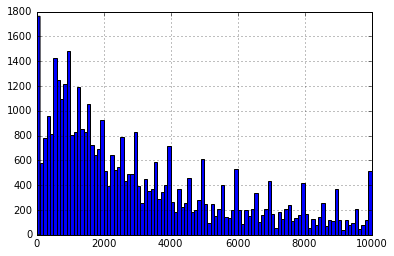

In [214]:

autos.price.hist(range=[0,10000], bins=100)


Looking at this (as the majority of cars seems to be under 10 000 $) I would say that only the very first 'bin' contains outlier cars - or they are started as 0-dollar auctions and at the moment they have no bids yet - in either case, I remove them as they are not representative of the car prices.

as for the top: There is a single outlier at 99999... price, I remove that as well after looking at it.

In [215]:
autos[autos.price>27322222] # The name translated says exchange for the same value - meaning the price is indeed not serious

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30


In [216]:
autos=autos[autos.price.between(100,27322223)]

## Cleaning - date-formats

The columns containing numbers are more or less done, now let's look at the date-formatted data

In [217]:
for col in ['date_crawled','ad_created','last_seen']:
    autos.loc[:,col]=pd.to_datetime(autos[col].str[:10])#Despite the warning, the datetime is transformed for now...

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



There is a warning, normally I would use assign but that is uglier in a loop.

In [218]:
autos

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01
5,2016-03-21,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21,22962,2016-04-06
6,2016-03-20,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20,31535,2016-03-23
7,2016-03-16,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16,53474,2016-04-07
8,2016-03-22,Seat_Arosa,250,test,NaN,2000,manuell,0,arosa,150000,10,NaN,seat,nein,2016-03-22,7426,2016-03-26
9,2016-03-16,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,590,control,bus,1997,manuell,90,megane,150000,7,benzin,renault,nein,2016-03-16,15749,2016-04-06


In [195]:
autos[['date_crawled','ad_created','last_seen']].describe()

,date_crawled,ad_created,last_seen
count,48237,48237,48237
unique,34,76,34
top,2016-04-03 00:00:00,2016-04-03 00:00:00,2016-04-06 00:00:00
freq,1862,1874,10707
first,2016-03-05 00:00:00,2015-06-11 00:00:00,2016-03-05 00:00:00
last,2016-04-07 00:00:00,2016-04-07 00:00:00,2016-04-07 00:00:00


The takeaway here is that I have no missing columns - and I have a fairly short timeframe

In [220]:
autos.registration_year.describe()

count    48237.000000
mean      2004.728652
std         87.886096
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Dates - outliers

Here I still have issues - hopefully the last ones - as I have cars registered in 1000 (nice chariot, I have to say) and also we have another DeLorean as well...

In [223]:
autos.registration_year.value_counts().sort_index(ascending=True)

1000       1
1001       1
1111       1
1800       2
1910       2
1927       1
1929       1
1931       1
1934       2
1937       4
1938       1
1939       1
1941       2
1943       1
1948       1
1950       1
1951       2
1952       1
1953       1
1954       2
1955       2
1956       4
1957       2
1958       4
1959       6
1960      23
1961       6
1962       4
1963       8
1964      12
        ... 
2000    3104
2001    2630
2002    2477
2003    2693
2004    2699
2005    2911
2006    2669
2007    2273
2008    2210
2009    2081
2010    1587
2011    1618
2012    1308
2013     801
2014     663
2015     380
2016    1202
2017    1384
2018     469
2019       2
2800       1
4100       1
4500       1
4800       1
5000       3
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, Length: 95, dtype: int64

I shall exclude the chariots as well as... probably some OT cars? But I'll say that anything before 1900 is not a car.

Also, since the ads are crawled in 2016... I find it hard to believe that there are cars registered after 2016.

In [229]:
autos=autos[autos.registration_year.between(1900,2016)]

In [231]:
autos.registration_year.describe()

count    46363.000000
mean      2002.937256
std          7.132220
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

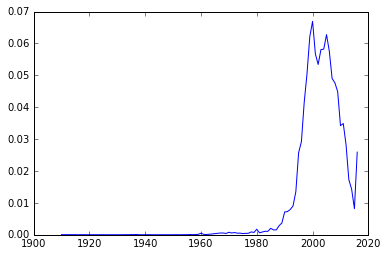

In [234]:
plt.plot(autos.registration_year.value_counts(normalize=True).sort_index(ascending=True))

I could probably cut out everything before 1980 - the reason being that OT cars are handled a bit differently to "modern" cars...

On the other hand, they are so few that I don't expect them to be a meaningful amount

## Next: Brands

In [241]:
autos.brand.value_counts()

volkswagen        9802
bmw               5108
opel              4972
mercedes_benz     4480
audi              4022
ford              3239
renault           2182
peugeot           1384
fiat              1187
seat               846
skoda              761
nissan             711
mazda              706
smart              658
citroen            652
toyota             593
hyundai            464
sonstige_autos     445
volvo              423
mini               408
mitsubishi         379
honda              365
kia                328
alfa_romeo         309
porsche            279
suzuki             275
chevrolet          263
chrysler           163
dacia              123
daihatsu           116
jeep               106
subaru              98
land_rover          98
saab                77
jaguar              71
daewoo              69
trabant             63
rover               62
lancia              49
lada                27
Name: brand, dtype: int64

The top 5 cars represent more than 60% of the data - they might be interesting as individual samples as well. 



In [243]:
mean_prices={}
for brand in autos.brand.value_counts().index[:5]:
    mean_prices[brand]=autos[autos.brand==brand].price.mean()

In [245]:
mean_prices

{'audi': 9380.718547986076,
 'bmw': 8621.729052466719,
 'mercedes_benz': 8672.654241071428,
 'opel': 5487.932220434433,
 'volkswagen': 6772.8804325647825}

Of course, all 5 are prestigious brands, meaning they are not in the lowest of the low. 

But I can still create the histograms of the prices to see the distributions.

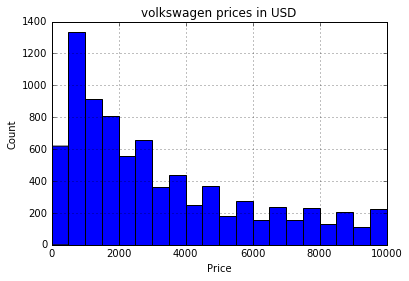

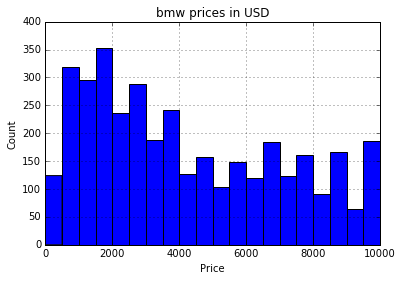

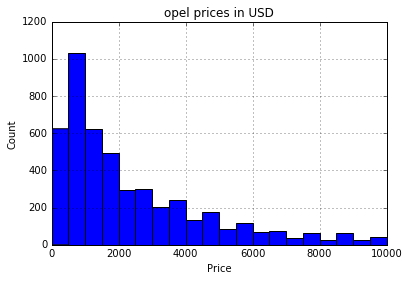

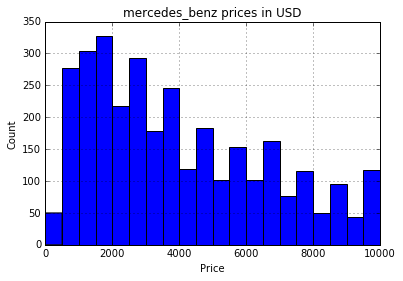

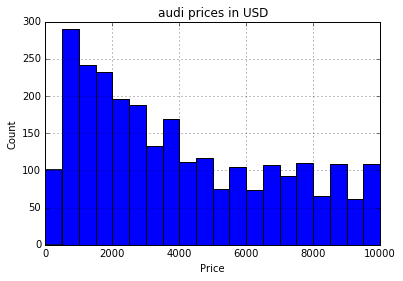

In [251]:
for brand in autos.brand.value_counts().index[:5]:
    plt.figure()
    autos[autos.brand==brand].price.hist(bins=20, range=[0,10000])
    plt.title(brand+" prices in USD")
    plt.ylabel("Count")
    plt.xlabel("Price")
    

As seen, 'mean' - which is advised in the guide - is not a very descriptive statistic, as most brands (even Audi) are "bottom heavy", but at the same time it represents how high/abundant the top is, so it tells something... 

## Next steps: THe data is not "clean" yet, but much nicer. 

The time data can be made uniform, and the german words could also be changed to be english.

## Odometers

As next steps, one could find even the most common models within brands, and look at the distribution in mileage and look at a correlation between the odometer and prices - as we would expect to have one. 

Also, one could look at the repair data as that also should have a significant impact on the price. 

I will just sweep through the last two points briefly in one cell each, to see whether I'm right or wrong about this.

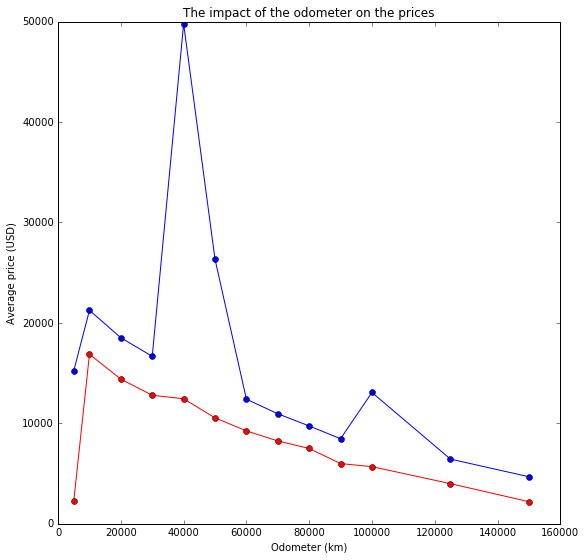

In [263]:
plt.figure(figsize=(9,9))
plt.title("The impact of the odometer on the prices")
mean_values=[]#The mean for every category
medians=[]
for valid_value in autos.odometer_km.sort_values().unique():
    mean_values.append(autos[autos.odometer_km==valid_value].price.mean())
    medians.append(autos[autos.odometer_km==valid_value].price.median())
plt.plot(autos.odometer_km.sort_values().unique(), mean_values, "bo-", label="means")# I don't need legend
plt.plot(autos.odometer_km.sort_values().unique(), medians, "ro-", label="medians")# I don't need legend
plt.legend()
#plt.ylim(0,10000)# Above this we don't have many cars, and those are expensive regardless of the odometer
plt.xlabel("Odometer (km)")
plt.ylabel("Average price (USD)")

The medians show a much more consistent trend, indicating that the means might be skewed by the few ridiculously expensive cars...

Now a peek at the repair data with the notion that this might be redundant: As the repair data can be a direct consequence of the odometer's state (ie. the usage of the car) and a bunch of other parameters (more reliable manufacturer etc...), but nontheless it might be worth looking at. 

To exclude the expected correlation of repair data - odometer, I will plot the above figure but separating the repaired and non-repaired cars.


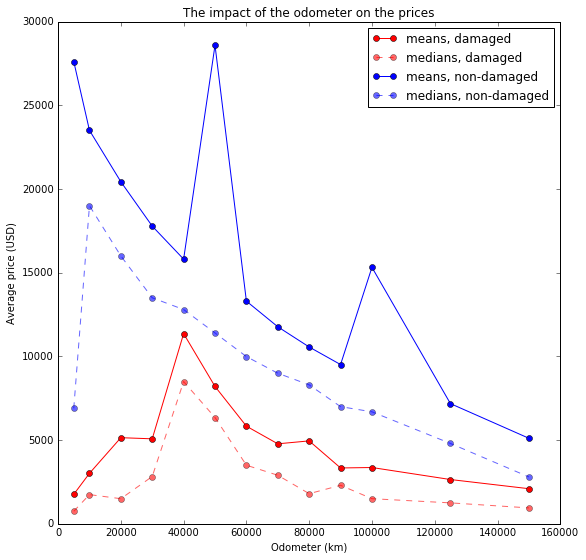

In [268]:
plt.figure(figsize=(9,9))
plt.title("The impact of the odometer on the prices")
nRmean_values=[]#The mean for every category
nRmedians=[]
Rmean_values=[]#The mean for every category
Rmedians=[]
for valid_value in autos.odometer_km.sort_values().unique():
    nRmean_values.append(autos[(autos.odometer_km==valid_value)& (autos.unrepaired_damage=="nein")].price.mean())
    nRmedians.append(autos[(autos.odometer_km==valid_value)& (autos.unrepaired_damage=="nein")].price.median())
    Rmean_values.append(autos[(autos.odometer_km==valid_value)& (autos.unrepaired_damage=="ja")].price.mean())
    Rmedians.append(autos[(autos.odometer_km==valid_value)& (autos.unrepaired_damage=="ja")].price.median())

plt.plot(autos.odometer_km.sort_values().unique(), Rmean_values, "ro-", label="means, damaged")# I don't need legend
plt.plot(autos.odometer_km.sort_values().unique(), Rmedians, "ro--", alpha=.6,label="medians, damaged")# I don't need legend
plt.plot(autos.odometer_km.sort_values().unique(), nRmean_values, "bo-", label="means, non-damaged")# I don't need legend
plt.plot(autos.odometer_km.sort_values().unique(), nRmedians, "bo--", alpha=.6,label="medians, non-damaged")# I don't need legend
# I could do this in a loop but it is not worth it for 2 values
plt.legend()
#plt.ylim(0,10000)# Above this we don't have many cars, and those are expensive regardless of the odometer
plt.xlabel("Odometer (km)")
plt.ylabel("Average price (USD)")

## Conclusion, takeaways


As expected, the damaged are lower, but overall gives the same 'shape' as the undamaged counterparts. 

The "spike" seems to be present around 40 000 km-s for both damaged and undamaged cars, which is interesting - and for undamaged, it does not "go away" when using median instead of mean. 

Anyway, this concludes the data exploration project.

## Room for improvement:

Of course, this project can be improved/continued for more steps, for example:

        - Translating the german keywords, looking at the columns with string data to see which categories can be introduced as "dummies" later.
        -  Brand and/or model-wise analysis for the most common cars.